#### As a Data Scientist | customer Analyst, my interest is the development of predictive segments using the RFM modelling to help Marketing Managers better serve their customers and maximize their customer lifetime value. 

#### The RFM (Recency, Frequency, and Monetary) model categorises customers based on their transaction history - how recently, how often and how much money was spent?

#### Designing the appropriate CRM (Customer Relationship Management) strategies would help the business exceed it's customers' expectations and adopting the right customer rention strategies would further deepen it's relationship with them; hence the need for the adoption of the right customer-centric strategies.


#### A very effective way of distinguishing between customers and understanding their behaviour is combining CRM  with analytics. Thus, RFM analysis would be use to answers business questions like:

#### Who are the best customers?

#### Which customers are on the verge of churning?

#### who are lost customers that the business can afford to ignore to effectively utilize budgets? 

#### Which customer is likely to be loyal in the near future?

#### This model is linked to the popular 80/20 pareto principle which when applied to marketing indicates that 80% of the total revenue likely comes from the top 20% of the customers, thus making the identification and retention of such customers highly critical for business success.

### Methodology
#### This analysis leverages a historical retail transaction data which contains customers' transactions from May 2011 to March 2015.  Python programming language would be used to obtain the frequency, recency and monetary values in the last 2 years (730 days) for each customer, so that they get grouped into different segments which would determine the appropriate marketing strategies.

### Variable Description
#### The dataset contains three variable: 
#### customer_id - Unique customer Identification number
#### trans_date - date of the transaction
#### tran_amount - monetary value of the transaction.

In [1]:
#importing the libraries
import pandas as pd
import warnings
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

In [2]:
#Loading the dataset
rfmdata= pd.read_csv('Retail_Data_Transactions.csv')
rfmdata.head()

,customer_id,trans_date,tran_amount
0,CS5295,11-Feb-13,35
1,CS4768,15-Mar-15,39
2,CS2122,26-Feb-13,52
3,CS1217,16-Nov-11,99
4,CS1850,20-Nov-13,78


In [3]:
# This shows that the dataset contains 3 columns and 124999 rows of observation
rfmdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125000 entries, 0 to 124999
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   customer_id  125000 non-null  object
 1   trans_date   125000 non-null  object
 2   tran_amount  125000 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.9+ MB


In [4]:
#Checking the details of customers transactions.
rfmdata.describe()

,tran_amount
count,125000.000000
mean,64.991912
std,22.860006
min,10.000000
25%,47.000000
50%,65.000000
75%,83.000000
max,105.000000


#### This reveals that most of the customers per transaction, spend £105 on the avearage with £10 being the lowest and £105 being the hightest value of spend.  


In [5]:
#Total number of customers 
rfmdata['customer_id'].nunique()

6889

In [8]:
# change the tran-date column to datetime
rfmdata['trans_date'] = pd.to_datetime(rfmdata['trans_date'])
rfmdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125000 entries, 0 to 124999
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   customer_id  125000 non-null  object        
 1   trans_date   125000 non-null  datetime64[ns]
 2   tran_amount  125000 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.9+ MB


In [9]:
rfmdata.head()

,customer_id,trans_date,tran_amount
0,CS5295,2013-02-11,35
1,CS4768,2015-03-15,39
2,CS2122,2013-02-26,52
3,CS1217,2011-11-16,99
4,CS1850,2013-11-20,78


#### Checking for the earliest and lastest transaction date

In [10]:
rfmdata['trans_date'].min()

Timestamp('2011-05-16 00:00:00')

In [11]:
rfmdata['trans_date'].max()

Timestamp('2015-03-16 00:00:00')

In [12]:
#Assuming this analysis is being done on the 01/04/2015,finding the number of days from the
#last transaction date which would be used to calculate the recency value.
sd = dt.datetime(2015,4,1)
rfmdata['hist']=sd - rfmdata['trans_date']
rfmdata['hist'].astype('timedelta64[D]')
rfmdata['hist']=rfmdata['hist'] / np.timedelta64(1, 'D')
rfmdata.head()

,customer_id,trans_date,tran_amount,hist
0,CS5295,2013-02-11,35,779.0
1,CS4768,2015-03-15,39,17.0
2,CS2122,2013-02-26,52,764.0
3,CS1217,2011-11-16,99,1232.0
4,CS1850,2013-11-20,78,497.0


In [14]:
# considering only transactions done within the ast 2 years (730 days)
rfmdata=rfmdata[rfmdata['hist'] < 730]
rfmdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63633 entries, 1 to 124999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   customer_id  63633 non-null  object        
 1   trans_date   63633 non-null  datetime64[ns]
 2   tran_amount  63633 non-null  int64         
 3   hist         63633 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 2.4+ MB


### Creating and validating the RFM Table

In [15]:
rfmTable = rfmdata.groupby('customer_id').agg({'hist': lambda x:x.min(), # Recency
                                        'customer_id': lambda x: len(x), # Frequency
                                        'tran_amount': lambda x: x.sum()})# Monetary

rfmTable.rename(columns={'hist': 'recency', 
                         'customer_id': 'frequency', 
                         'tran_amount': 'monetary'}, inplace=True)

rfmTable.head()


,recency,frequency,monetary
customer_id,,,
CS1112,77.0,6,358
CS1113,51.0,11,775
CS1114,48.0,11,804
CS1115,27.0,10,765
CS1116,219.0,5,333


#### The RFM table shows that customer CS1114 has the highest monetary value of £804, purchased 11 times and his last transaction day was 48 days ago

In [16]:
rfmdata[rfmdata['customer_id']=='CS1114']

,customer_id,trans_date,tran_amount,hist
2850,CS1114,2015-02-12,79,48.0
3146,CS1114,2013-12-29,105,458.0
6736,CS1114,2013-12-12,43,475.0
26900,CS1114,2014-02-04,95,421.0
35555,CS1114,2014-12-31,95,91.0
64947,CS1114,2014-08-31,46,213.0
69146,CS1114,2013-05-27,68,674.0
70087,CS1114,2014-09-01,58,212.0
72970,CS1114,2013-09-11,84,567.0
76124,CS1114,2014-01-25,94,431.0


#### To validate the RFM table, the transaction history of customer CS1114 was used for cross-checking and the result proved the RFM table to be accurate.

## Exploratory Data Analysis

#### Visualizing the Recency Value

<AxesSubplot:xlabel='recency'>

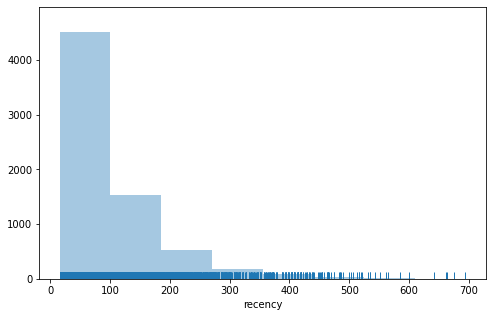

In [36]:
plt.figure(figsize=(8,5))
sns.distplot(rfmSeg.recency,bins=8,kde=False,rug=True)

#The visualization shows that the number of customers that transacted with the business within the last 90 days are more than those that didn't within the last two years. 

### Visualizing the Frequency Value

<AxesSubplot:xlabel='frequency'>

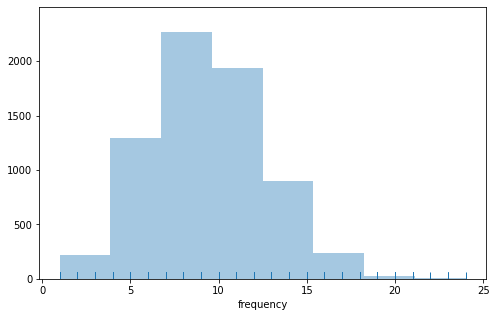

In [37]:
plt.figure(figsize=(8,5))
sns.distplot(rfmSeg.frequency,bins=8,kde=False,rug=True)
#The plot shows that the number of customers that transacted between 7 tp 9 times is far more than those that did 5 times or 15 times. 

### Visualizing the Monetary Value

<AxesSubplot:xlabel='monetary'>

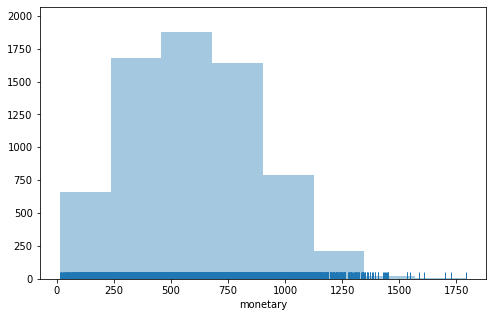

In [62]:
plt.figure(figsize=(8,5))
sns.distplot(rfmSeg.monetary,bins=8,kde=False,rug=True)
#The monetary value is the sum of the value of each customer's transaction.
#The plot shows that most customers spent in total between £400 and £600 with the last two years.  

#### Visualizing Recency VS Frequency

Text(0, 0.5, 'frequency')

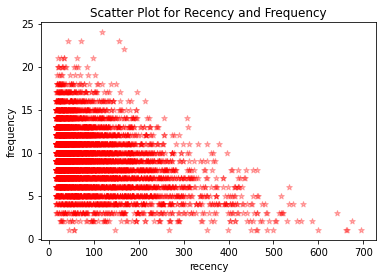

In [55]:
plt.scatter(rfmSeg.groupby('customer_id')['recency'].sum(), rfmSeg.groupby('customer_id')['frequency'].sum(),
            color = 'red',
            marker = '*', alpha = 0.3)

plt.title('Scatter Plot for Recency and Frequency') 
plt.xlabel('recency')
plt.ylabel('frequency')

#The plot shows that the customers that bought most recently, transact most frequently with the business.

#### visualizing Frequency vs Monetary
             

Text(0, 0.5, 'Frequency')

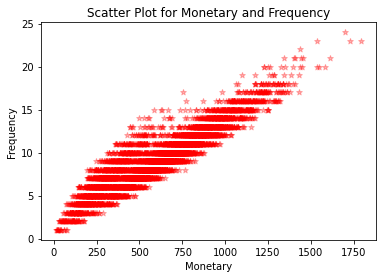

In [56]:

plt.scatter(rfmSeg.groupby('customer_id')['monetary'].sum(), rfmSeg.groupby('customer_id')['frequency'].sum(),
            color = 'red',
            marker = '*', alpha = 0.3)

plt.title('Scatter Plot for Monetary and Frequency') 
plt.xlabel('Monetary')
plt.ylabel('Frequency')

#The plot is showing that the highest spender buy most frequently and there is a concentration of customers around the average for both frequency and monetary.
#The monetary value has a positive correlation with frequency;  the number of transactions increase as more money is spent.

#### Recency VS Frequency VS Monetary

Text(0, 0.5, 'Frequency')

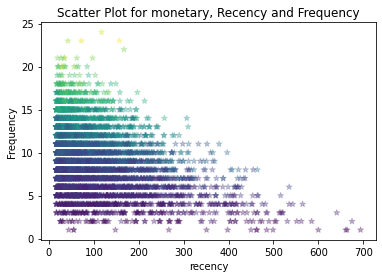

In [48]:
Monetary = rfmdata.groupby('customer_id')['tran_amount'].sum()
plt.scatter(rfmSeg.groupby('customer_id')['recency'].sum(), rfmSeg.groupby('customer_id')['frequency'].sum(),
            marker = '*', alpha = 0.3,c= Monetary)

plt.title('Scatter Plot for monetary, Recency and Frequency')
plt.xlabel('recency')
plt.ylabel('Frequency')

#The colours indicate monetary value. The customers with higher spending power have lower frequency with varying recency values.

#### Obtaining the the RFM Scores using the Quintile Method.

In [17]:
quintiles = rfmTable.quantile(q=[0.20,0.40,0.60,0.80])
quintiles

,recency,frequency,monetary
0.2,33.0,6.0,338.0
0.4,55.0,8.0,510.0
0.6,88.0,10.0,672.0
0.8,144.0,12.0,845.0


#### Inserting quintles into a dictionary for ease of use


In [18]:
quintiles=quintiles.to_dict()
quintiles

{'recency': {0.2: 33.0, 0.4: 55.0, 0.6: 88.0, 0.8: 144.0},
 'frequency': {0.2: 6.0, 0.4: 8.0, 0.6: 10.0, 0.8: 12.0},
 'monetary': {0.2: 338.0, 0.4: 510.0, 0.6: 672.0, 0.8: 845.0}}

In [19]:
rfmSeg = rfmTable

#### Scores between 1 and 5 are being assigned to Recency, Frequency and Monetary, 5 being the best score and 1 being the least.

In [31]:
# Arguments (x = value, p = recency, monetary_value, frequency, k = quintile dict)
#Finding the Recency, freqency and Monetary for each customer

def RFMClass(x,p,d):
    if x <= d[p][0.20]:
        return 5
    elif x <= d[p][0.40]:
        return 4
    elif x <= d[p][0.60]: 
        return 3
    elif x <= d[p][0.80]: 
        return 2
    else:
        return 1

In [32]:
rfmSeg = rfmTable
rfmSeg['R_score'] = rfmSeg['recency'].apply(RFMClass, args=('recency',quintiles,))
rfmSeg['F_score'] = rfmSeg['frequency'].apply(RFMClass, args=('frequency',quintiles,))
rfmSeg['M_score'] = rfmSeg['monetary'].apply(RFMClass, args=('monetary',quintiles,))

In [33]:
#Creating the RFM score by concartinating all scores 

rfmSeg['RFMscore'] = rfmSeg.R_score.map(str) \
                            + rfmSeg.F_score.map(str) \
                            + rfmSeg.M_score.map(str)

In [34]:
rfmSeg.head()

,recency,frequency,monetary,R_score,F_score,M_score,RFMscore
customer_id,,,,,,,
CS1112,77.0,6,358,3,5,4,354
CS1113,51.0,11,775,4,2,2,422
CS1114,48.0,11,804,4,2,2,422
CS1115,27.0,10,765,5,3,2,532
CS1116,219.0,5,333,1,5,5,155


#### Every customer has now been assigned their RFM score, showing what category they belong to.

In [35]:
#Sorting the RFM in asscending order
rfmSeg.sort_values(by=['RFMscore', 'monetary'], ascending=[True, False])

,recency,frequency,monetary,R_score,F_score,M_score,RFMscore
customer_id,,,,,,,
CS1541,157.0,23,1791,1,1,1,111
CS3799,167.0,22,1440,1,1,1,111
CS1215,149.0,18,1235,1,1,1,111
CS3842,197.0,17,1211,1,1,1,111
CS6059,151.0,14,1138,1,1,1,111
...,...,...,...,...,...,...,...
CS7941,30.0,2,108,5,5,5,555
CS8188,17.0,3,106,5,5,5,555
CS8304,26.0,2,79,5,5,5,555


In [60]:
rfmSeg[rfmSeg['RFMscore']=='555'].sort_values('monetary', ascending=False).head(5)

,recency,frequency,monetary,R_score,F_score,M_score,RFMscore
customer_id,,,,,,,
CS7380,32.0,6,335,5,5,5,555
CS1574,23.0,6,333,5,5,5,555
CS7625,21.0,6,332,5,5,5,555
CS3146,22.0,5,331,5,5,5,555
CS4402,33.0,6,329,5,5,5,555


#### The values above show the top 5 customers with RFM score- 555, that interact with the business frequently, not long ago, then are the biggest spenders. 

### The insights provided by this RFM modelling would help this business engage with its customer groups differently with targeted marketing strategies.